In [2]:
from google.colab import files
uploaded = files.upload()

Saving rotten_tomatoes_reviews.csv to rotten_tomatoes_reviews.csv


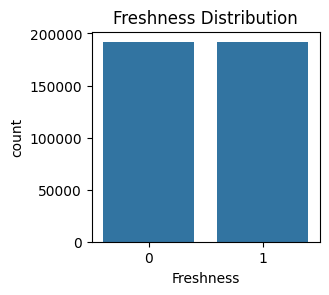

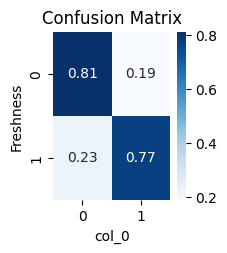

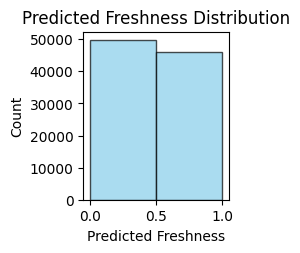

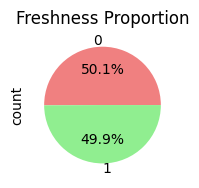

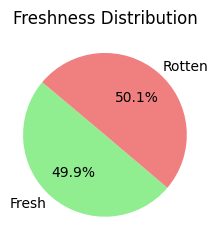

Model accuracy is satisfactory. Continuing with deployment.
Deploying model...
Prediction: Fresh
Accuracy: 0.7926354166666667


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


def train_and_predict(new_input):
    # Load the dataset
    df = pd.read_csv('rotten_tomatoes_reviews.csv')

    # Split the dataset into training and testing sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    # Vectorize the reviews using CountVectorizer
    vectorizer = CountVectorizer(max_features=20000)
    X_train = vectorizer.fit_transform(train_df['Review'])
    X_test = vectorizer.transform(test_df['Review'])

    # Train a Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train, train_df['Freshness'])

    # Make predictions on the testing set
    predictions = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(test_df['Freshness'], predictions)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Bar Chart
    plt.subplot(2, 3, 1)
    sns.countplot(data=train_df, x='Freshness')
    plt.title('Freshness Distribution')
    plt.show()

    # Heat Map
    plt.subplot(2, 3, 2)
    sns.heatmap(pd.crosstab(test_df['Freshness'], predictions, normalize='index'), annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # Histogram
    plt.subplot(2, 3, 3)
    plt.hist(predictions, bins=2, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Predicted Freshness')
    plt.ylabel('Count')
    plt.title('Predicted Freshness Distribution')
    plt.show()

    # Pie Chart
    plt.subplot(2, 3, 4)
    test_df['Freshness'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    plt.title('Freshness Proportion')
    plt.show()

    # Treemap
    plt.subplot(2, 3, 5)
    labels = ['Fresh', 'Rotten']
    sizes = [test_df['Freshness'].value_counts()[1], test_df['Freshness'].value_counts()[0]]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
    plt.axis('equal')
    plt.title('Freshness Distribution')

    plt.tight_layout()
    plt.show()

    # Vectorize the new input
    new_input_vectorized = vectorizer.transform([new_input])

    # Make prediction on the new input
    new_prediction = clf.predict(new_input_vectorized)[0]

    return new_prediction, accuracy

# Model Evaluation
def evaluate_model(accuracy):
    if accuracy >= 0.75:
        print("Model accuracy is satisfactory. Continuing with deployment.")
        return True
    else:
        print("Model accuracy is below threshold. Changing the algorithm.")
        return False

# Build the Predictive Model
def build_model():
    # For simplicity, using the previous train_and_predict function
    return train_and_predict

# Deploy the model
def deploy_model(new_input):
    prediction, accuracy = build_model()(new_input)
    if(prediction == 1):
        prediction = "Fresh"
    else:
        prediction = "Rotten"

    if evaluate_model(accuracy):
        print("Deploying model...")
        print("Prediction:", prediction)
        print("Accuracy:", accuracy)
    else:
        print("Model needs improvement.")

# Example usage
new_input = "This movie is absolutely fantastic, a must-watch!"
deploy_model(new_input)